# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 5
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_5D_modisa_3.csv
out_filename: df_chl_out_5D_modisa_4.csv


,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
6239,34710,2002-11-01,16.907900,13.195850,0.000120,12.28250,0.000063,63.130950,1.024050,28.998850,0.001754,0.386388,-0.412976,0.060749,-1.216459,592.46100
6476,10206,2002-11-06,11.049700,9.697750,0.001602,6.51645,0.000517,67.176750,-4.161400,NaN,1000.000000,0.133946,-0.873070,0.005581,-2.253287,536.67500
6498,34710,2002-11-06,17.339050,11.972150,0.000159,10.54180,0.000079,63.148450,-2.067400,28.832700,0.001884,0.379611,-0.420661,-0.006777,NaN,562.59100
6504,34721,2002-11-06,12.589150,15.204350,0.000143,0.91040,0.000071,67.828050,10.477750,29.497000,0.001856,0.148202,-0.829147,0.009522,-2.021272,487.07000
6735,10206,2002-11-11,11.160300,2.944400,0.001463,1.00360,0.000474,67.111450,-0.923050,NaN,1000.000000,0.125101,-0.902739,-0.008845,NaN,545.14200
6757,34710,2002-11-11,17.986600,27.674550,0.000102,26.75225,0.000055,62.959850,-2.543400,28.167400,0.001775,0.500674,-0.300445,0.121063,-0.916988,503.53300
6994,10206,2002-11-16,11.166650,3.065200,0.006093,-0.48170,0.001546,67.051800,-1.909650,NaN,1000.000000,0.140332,-0.852843,0.015231,-1.817272,549.51100
7016,34710,2002-11-16,19.448750,47.484750,0.000162,40.73835,0.000079,62.765100,-17.921000,27.723950,0.001810,0.569412,-0.244573,0.068738,-1.162806,416.43400
7257,15707,2002-11-21,12.418600,20.834500,0.000118,2.76235,0.000062,65.457300,-18.660150,NaN,1000.000000,0.162057,-0.790332,0.010989,-1.959042,735.57800


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

3.054956461412406e-15

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
6239,34710,2002-11-01,16.90790,13.19585,0.000120,12.28250,0.000063,63.13095,1.02405,28.99885,0.001754,0.386388,-0.412976,0.060749,-1.216459,592.461,0.031445
6476,10206,2002-11-06,11.04970,9.69775,0.001602,6.51645,0.000517,67.17675,-4.16140,NaN,1000.000000,0.133946,-0.873070,0.005581,-2.253287,536.675,0.008333
6498,34710,2002-11-06,17.33905,11.97215,0.000159,10.54180,0.000079,63.14845,-2.06740,28.83270,0.001884,0.379611,-0.420661,-0.006777,NaN,562.591,-0.003570
6504,34721,2002-11-06,12.58915,15.20435,0.000143,0.91040,0.000071,67.82805,10.47775,29.49700,0.001856,0.148202,-0.829147,0.009522,-2.021272,487.070,0.012850
6735,10206,2002-11-11,11.16030,2.94440,0.001463,1.00360,0.000474,67.11145,-0.92305,NaN,1000.000000,0.125101,-0.902739,-0.008845,NaN,545.142,-0.014141


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    754.000000
mean      -0.059923
std        0.352221
min       -4.195474
25%       -0.046804
50%        0.001365
75%        0.036548
max        0.194120
Name: chlor_a_logE_rate, dtype: float64

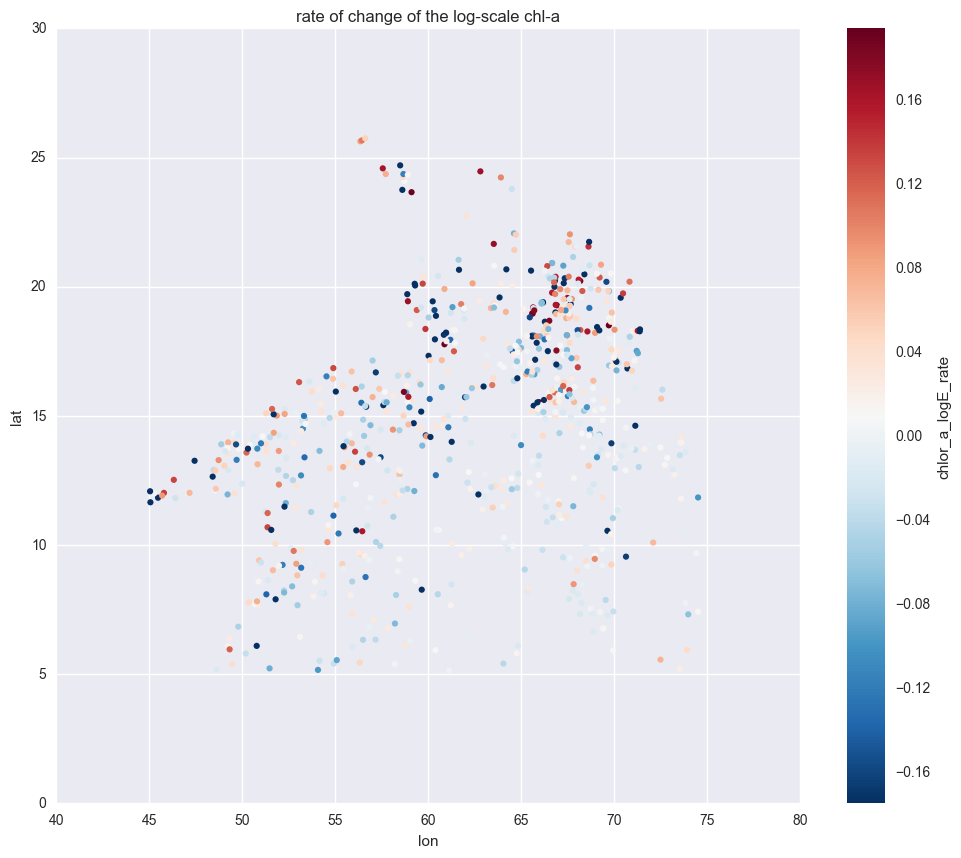

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

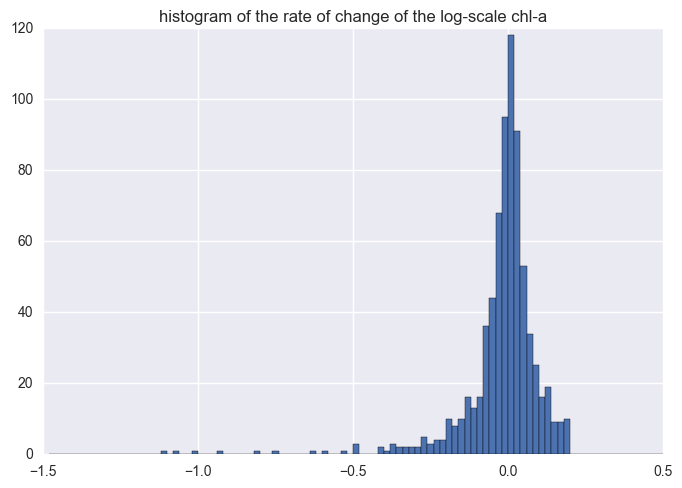

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

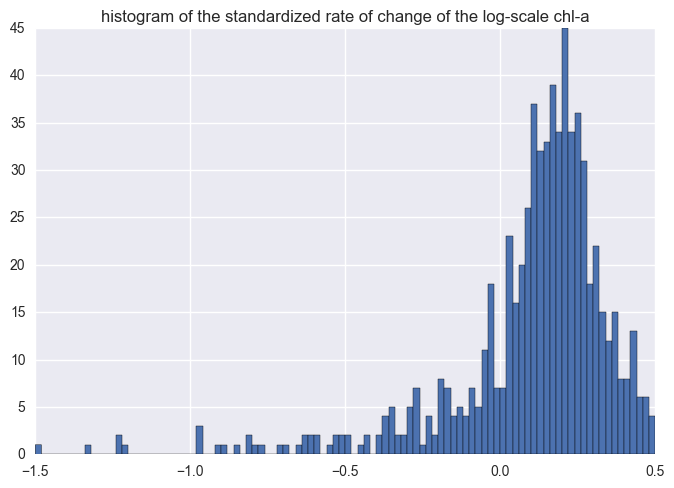

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [13]:
(np.log(0.140332)-np.log(0.125101))   / freq

0.022977926547090809

In [10]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:10206, time:2002-11-16"
# (0.140332 - 0.125101) / (freq*0.140332)    == 0.0217070946042243
#########
# Val 2:
# id:10206, time:2002-11-16"
# (np.log(0.140332)-np.log(0.125101))   / freq == 0.022977926547090809 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
6476,10206,2002-11-06,11.04970,9.69775,0.001602,6.51645,0.000517,67.17675,-4.16140,NaN,1000.0,0.133946,-0.873070,0.005581,-2.253287,536.675,0.008333
6735,10206,2002-11-11,11.16030,2.94440,0.001463,1.00360,0.000474,67.11145,-0.92305,NaN,1000.0,0.125101,-0.902739,-0.008845,NaN,545.142,-0.014141
6994,10206,2002-11-16,11.16665,3.06520,0.006093,-0.48170,0.001546,67.05180,-1.90965,NaN,1000.0,0.140332,-0.852843,0.015231,-1.817272,549.511,0.021707
7771,10206,2002-12-01,11.42495,13.95980,0.003342,5.01475,0.000973,66.58490,-12.89285,NaN,1000.0,0.130924,-0.882981,-0.006660,NaN,602.274,-0.010174
9066,10206,2002-12-26,12.57970,11.05175,0.001609,1.12345,0.000532,64.48845,-10.25210,NaN,1000.0,0.163904,-0.785410,0.007255,-2.139362,841.416,0.008853


In [14]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
6476,10206,2002-11-06,11.04970,9.69775,0.001602,6.51645,0.000517,67.17675,-4.16140,NaN,1000.0,0.133946,-0.873070,0.005581,-2.253287,536.675,0.008333
6735,10206,2002-11-11,11.16030,2.94440,0.001463,1.00360,0.000474,67.11145,-0.92305,NaN,1000.0,0.125101,-0.902739,-0.008845,NaN,545.142,-0.014141
6994,10206,2002-11-16,11.16665,3.06520,0.006093,-0.48170,0.001546,67.05180,-1.90965,NaN,1000.0,0.140332,-0.852843,0.015231,-1.817272,549.511,0.021707
7771,10206,2002-12-01,11.42495,13.95980,0.003342,5.01475,0.000973,66.58490,-12.89285,NaN,1000.0,0.130924,-0.882981,-0.006660,NaN,602.274,-0.010174
9066,10206,2002-12-26,12.57970,11.05175,0.001609,1.12345,0.000532,64.48845,-10.25210,NaN,1000.0,0.163904,-0.785410,0.007255,-2.139362,841.416,0.008853


In [15]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_5D_modisa_4.csv


,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
6476,10206,2002-11-06,11.04970,9.69775,0.001602,6.51645,0.000517,67.17675,-4.16140,NaN,1000.0,0.133946,-0.873070,0.005581,-2.253287,536.675,0.008333
6735,10206,2002-11-11,11.16030,2.94440,0.001463,1.00360,0.000474,67.11145,-0.92305,NaN,1000.0,0.125101,-0.902739,-0.008845,NaN,545.142,-0.014141
6994,10206,2002-11-16,11.16665,3.06520,0.006093,-0.48170,0.001546,67.05180,-1.90965,NaN,1000.0,0.140332,-0.852843,0.015231,-1.817272,549.511,0.021707
7771,10206,2002-12-01,11.42495,13.95980,0.003342,5.01475,0.000973,66.58490,-12.89285,NaN,1000.0,0.130924,-0.882981,-0.006660,NaN,602.274,-0.010174
9066,10206,2002-12-26,12.57970,11.05175,0.001609,1.12345,0.000532,64.48845,-10.25210,NaN,1000.0,0.163904,-0.785410,0.007255,-2.139362,841.416,0.008853


In [16]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


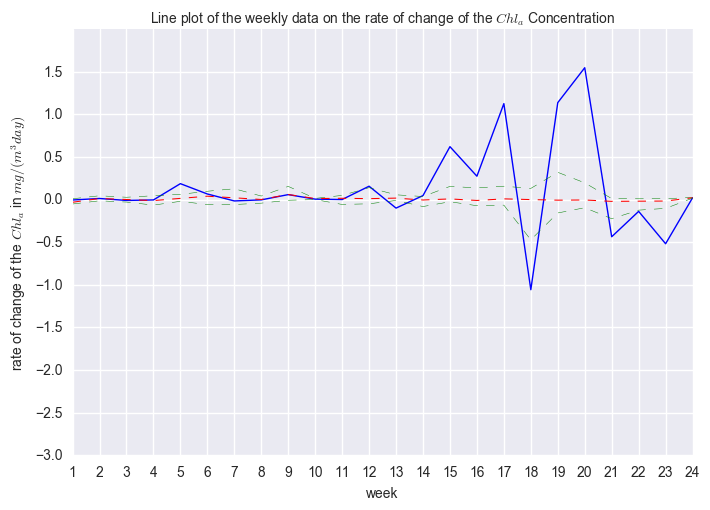

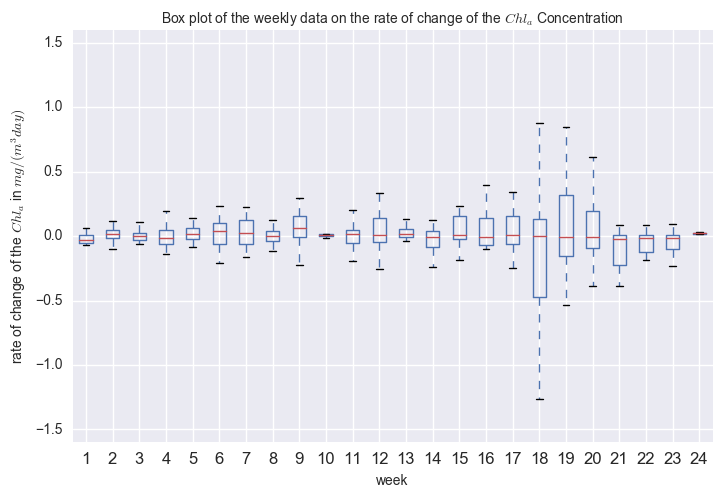

In [17]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

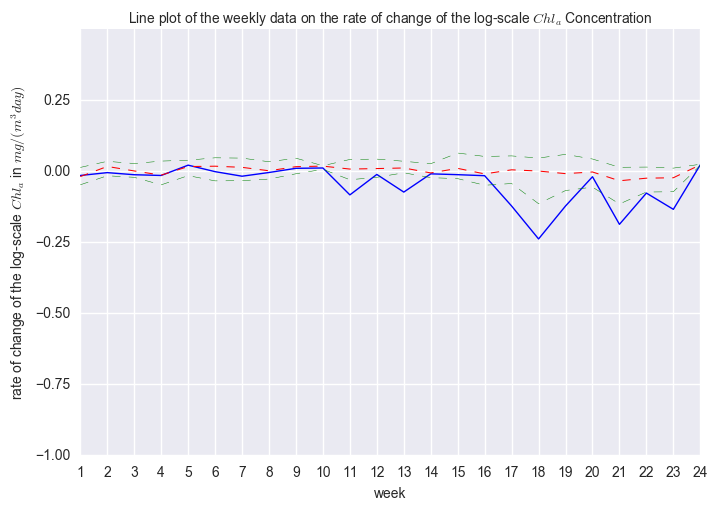

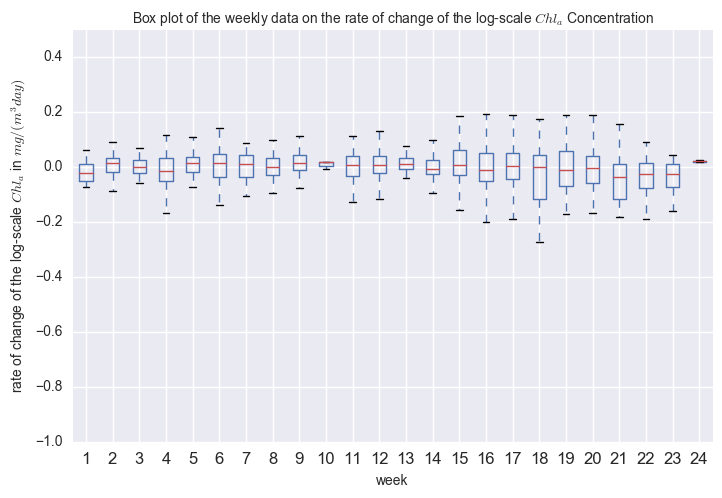

In [18]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [19]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    97.000000
mean      0.006104
std       0.111961
min      -0.404157
25%      -0.047131
50%       0.002679
75%       0.045035
max       0.460749
Name: chl_rate, dtype: float64


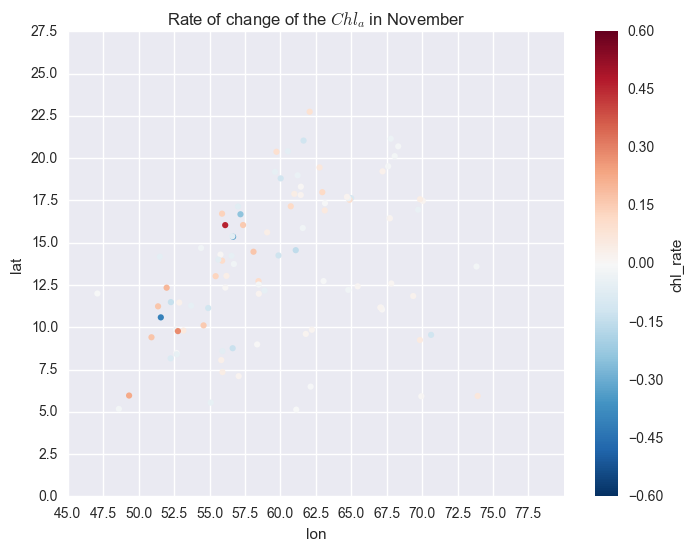



 summary of the Chl_rate 
 count    129.000000
mean       0.046758
std        0.349320
min       -1.179396
25%       -0.032362
50%        0.015151
75%        0.101449
max        3.077740
Name: chl_rate, dtype: float64


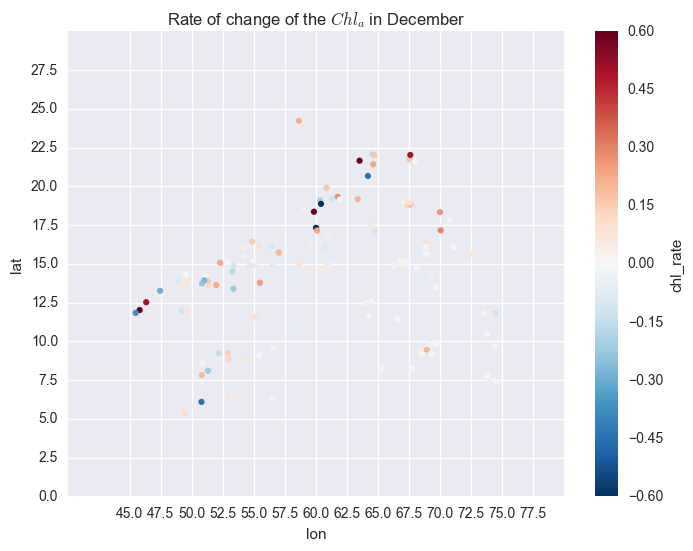



 summary of the Chl_rate 
 count    164.000000
mean       0.049640
std        2.162357
min      -17.974065
25%       -0.035945
50%        0.009778
75%        0.064007
max       18.673444
Name: chl_rate, dtype: float64


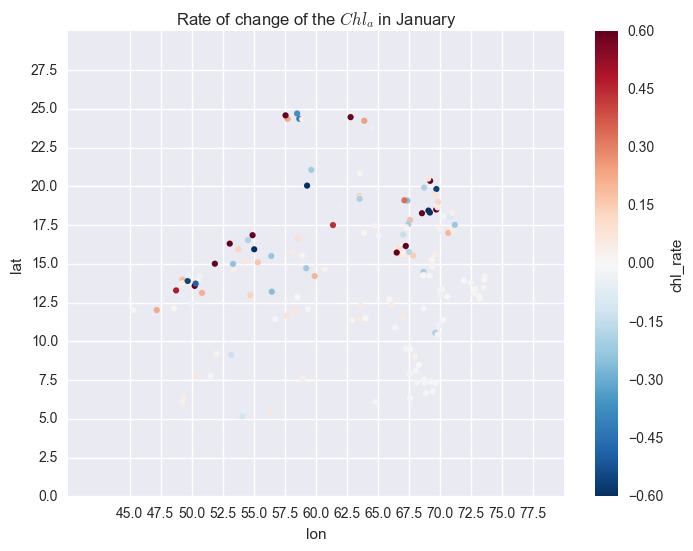



 summary of the Chl_rate 
 count    192.000000
mean       0.539977
std        6.774659
min      -30.045783
25%       -0.097550
50%        0.003890
75%        0.168379
max       66.830140
Name: chl_rate, dtype: float64


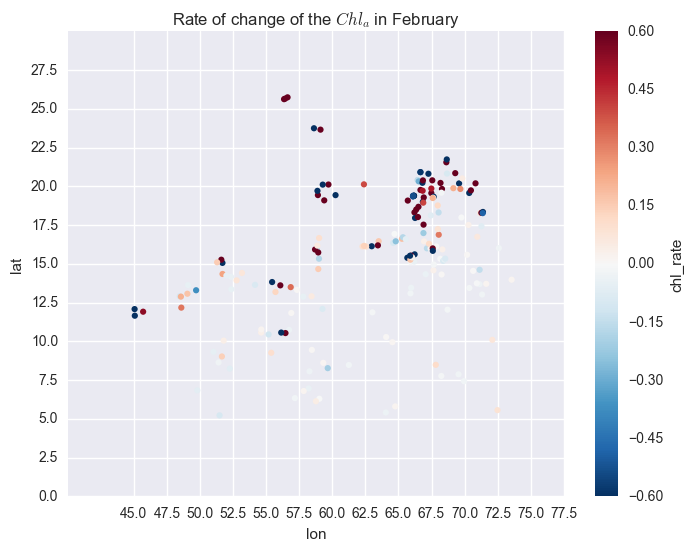



 summary of the Chl_rate 
 count    172.000000
mean       0.091771
std        3.731832
min      -15.048695
25%       -0.126783
50%       -0.015113
75%        0.013408
max       21.522390
Name: chl_rate, dtype: float64


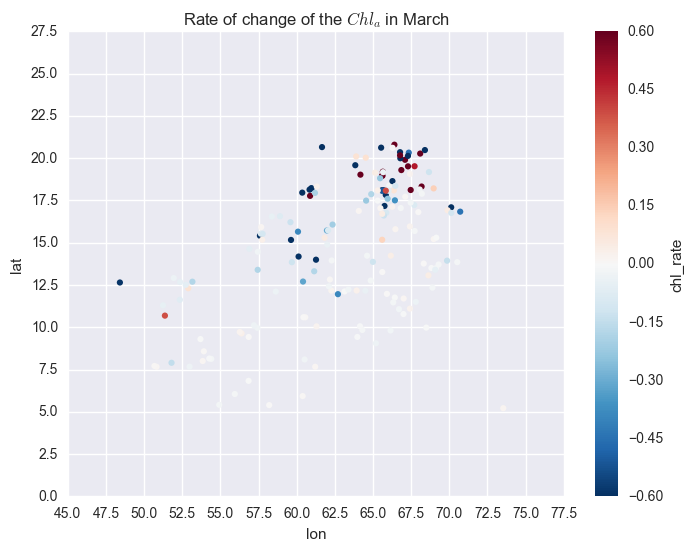

In [20]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [21]:
print("test")

test
